In [137]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [7]:
data = np.genfromtxt("../로그 데이터/NU-MineBench.csv", delimiter="\n", skip_header=1, dtype=np.int64).copy()
data

array([105950216192, 105943924736, 105946021888, ..., 103563653120,
       103565225984, 103560867840], dtype=int64)

In [30]:
delta = np.array([data[i+1] - data[i] for i in range(int(len(data))-1)])
delta, len(delta)

(array([-6291456,  2097152, -6148096, ..., -4751360,  1572864, -4358144],
       dtype=int64),
 63977)

In [16]:
data_counts = pd.Series(data=delta.T).value_counts()
data_counts

 4096        57121
 12288        2809
-6291456       520
 2097152       514
 36864         510
             ...  
-34471936        1
-2883584         1
 1966080         1
-10387456        1
-18833408        1
Length: 258, dtype: int64

In [148]:
def category_by_threshold(data_counts, threshold, sign="over"):
    if sign == "under":
        category = (data_counts < threshold)
    else:
        category = (data_counts > threshold)
    return category.index[category == True]

category_by_threshold(data_counts, 5)

Int64Index([    4096,    12288, -6291456,  2097152,    36864,    98304,
               61440,        0,    24576,   196608,    49152,   159744,
            -8384512,    73728,   294912,    86016,   135168,   110592,
              122880,   147456,   393216,   258048,   172032,   221184,
              233472,   491520,   184320,   208896,   356352,   380928,
              282624,   319488,   245760,   688128,   589824,   270336,
              368640, -8327168,   417792,   983040,   307200,   503808,
            -8093696,   405504,   786432,   430080,   749568, -8192000,
              577536],
           dtype='int64')

In [66]:
data_counts.loc[4096], data_counts.loc[0]

(57121, 273)

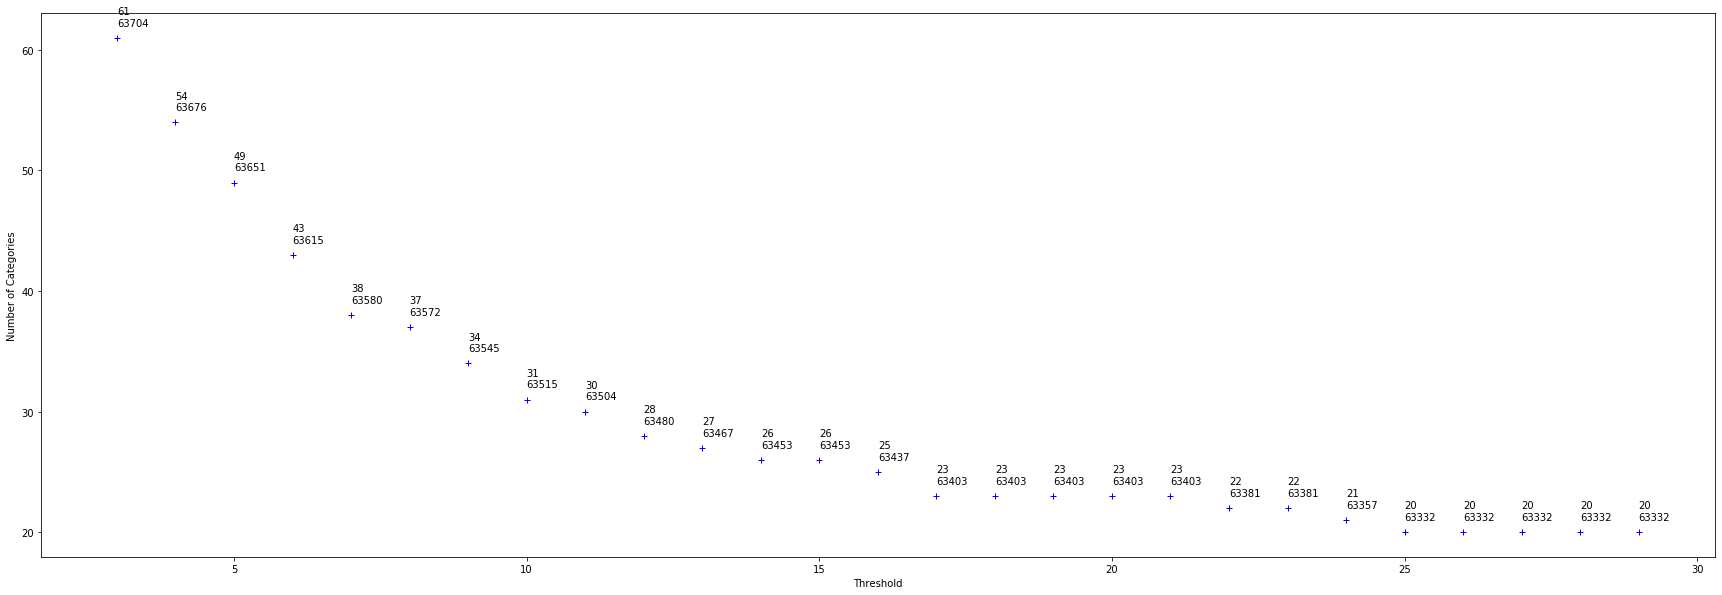

In [154]:
def data_over_threshold_plot(data_counts, range_init, range_end):
    plt.figure(figsize=(30, 10))
    data_over_threshold_incremental = pd.DataFrame(data=[(data_counts > i).value_counts().values for i in range(range_init, range_end)], columns=["Under Threshold", "Over Threshold"])
    plt.plot([i for i in range(range_init, range_end)], data_over_threshold_incremental["Over Threshold"], "b+")
    for i in range(range_init, range_end):
        text = "{}\n{}".format(data_over_threshold_incremental["Over Threshold"][i-range_init], sum(data_counts[category_by_threshold(data_counts, i)]))
        plt.text(i, data_over_threshold_incremental["Over Threshold"][i-range_init]+1, text)
    plt.xlabel("Threshold")
    plt.ylabel("Number of Categories")
    plt.show()

data_over_threshold_plot(data_counts, 3, 30)

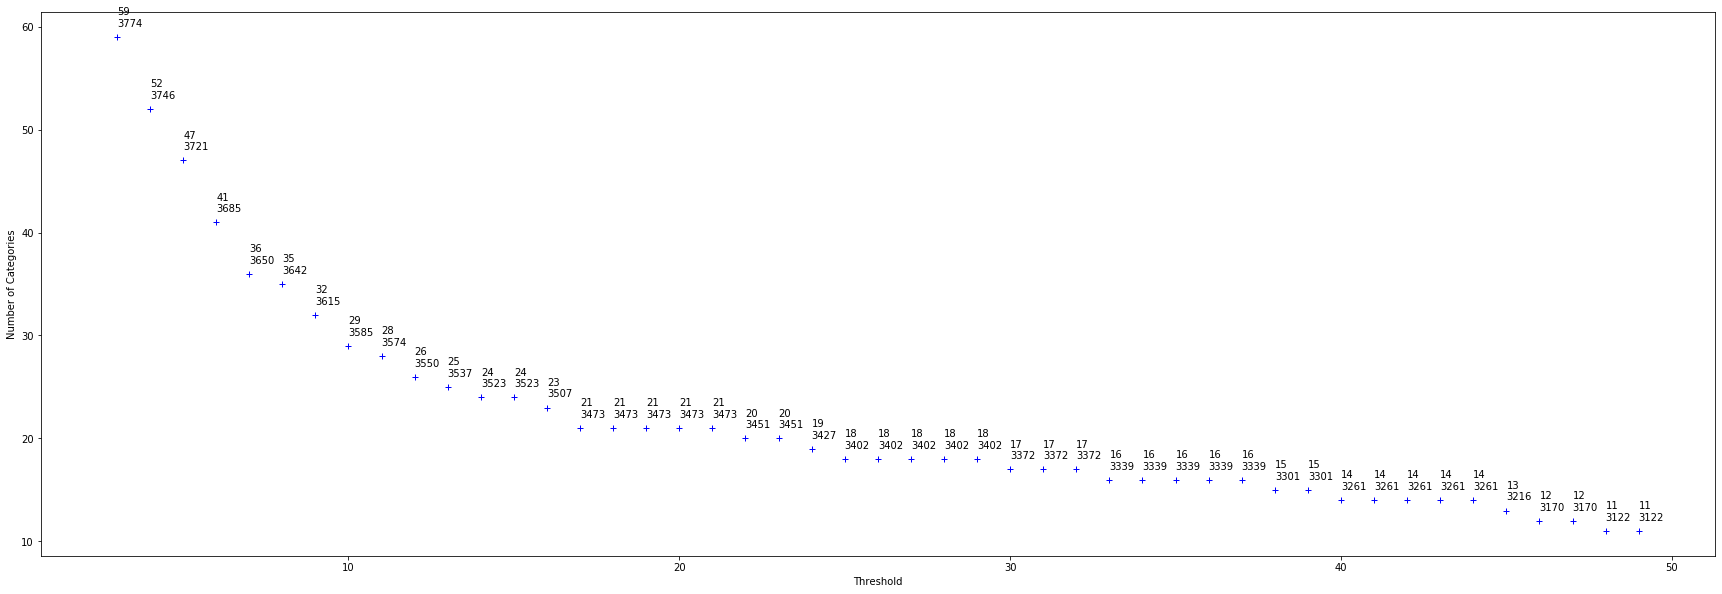

In [163]:
data_counts_without_top_2 = data_counts.drop([4096, 12288])
data_over_threshold_plot(data_counts_without_top_2, 3, 50)

In [164]:
data_counts[:12]

 4096       57121
 12288       2809
-6291456      520
 2097152      514
 36864        510
 98304        392
 61440        336
 0            273
 24576        248
 196608       110
 49152        107
 159744        60
dtype: int64

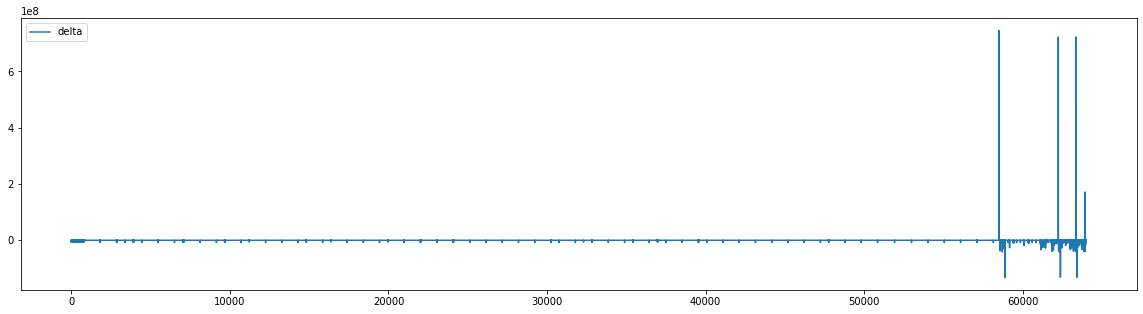

In [29]:
pd.DataFrame(data=delta, columns=["delta"]).plot()

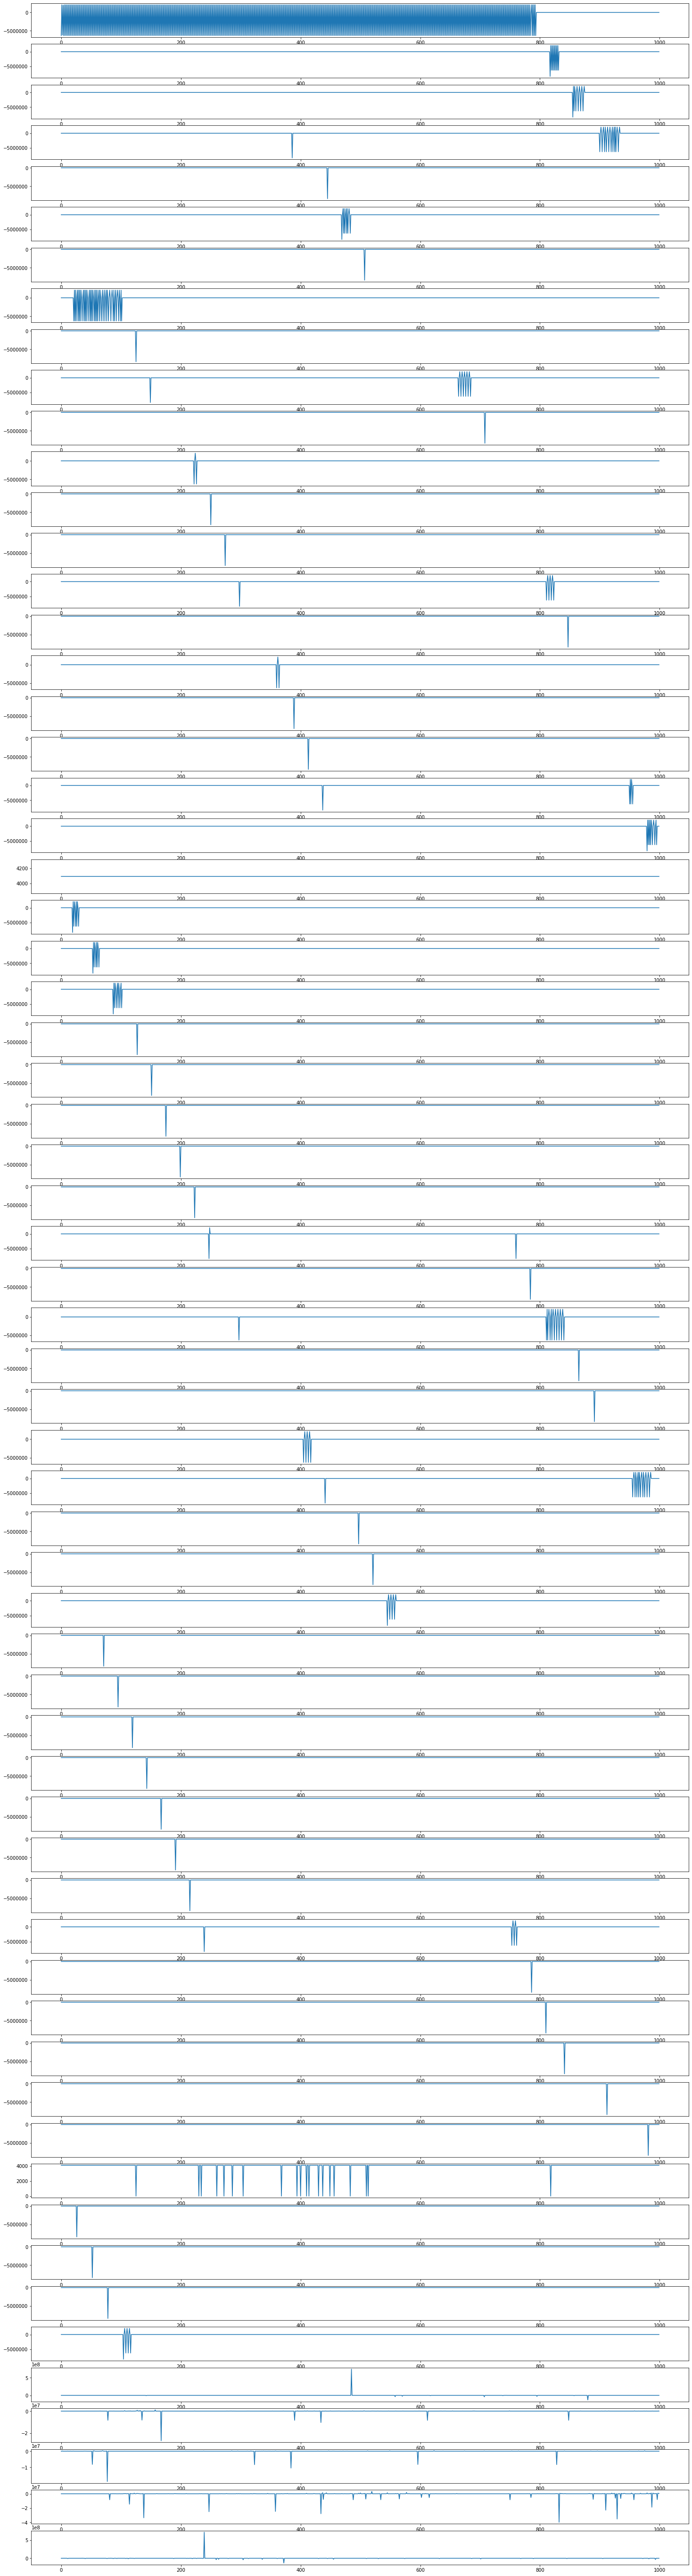

In [146]:
plt.figure(figsize=(25, 100))
for i in range(63):
        ax = plt.subplot(63, 1, i+1)
        plot = plt.plot(delta[i*1000:(i+1)*1000])